# Figure 2 in Hjorth et al, 2021 Neuroinformatics paper

This code can be run in parallel. To do that, please first start ```ipcluster```, on linux you write the following into the terminal, note that you should be in the same directory as the notebook is in (```examples/Neurinformatics2021/Figure2```):

```
export IPYTHONDIR="`pwd`/.ipython"
export IPYTHON_PROFILE=default
ipcluster start 
```

These commands are in ```start_ipcluster.sh``` in the ```examples/notebook``` directory. After starting ipcluster give it a few seconds to get fully up and running before proceeding with the rest of the commands in this notebook. 

If you restart the run you might need to do:

```
ipcluster stop
ipcluster start
```

For instructions how to install and activate ipyparallel for your notebook see 
https://github.com/ipython/ipyparallel

In [1]:
import os
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

In [2]:
from methods_paper_figure2 import MethodsPaperFigure2
from snudda import SnuddaPlace
from snudda import SnuddaDetect
from snudda import SnuddaPrune

network_type = ['No pruning',
                'DP',
                'DP, f1',
                'DP, f1, SM',
                'DP, f1, SM, mu2']

network_size = 10000
network_path = "Fig2_network"
config_list = []
network_file_list = []

for idx, nt in enumerate(network_type):
    config_name = os.path.join(f"network-config-{idx}.json")
    config_list.append(config_name)
    network_file = os.path.join(network_path, f"network-synapses-{idx}.hdf5")
    network_file_list.append(network_file)

In [3]:
for config_name, nt in zip(config_list, network_type):
    MethodsPaperFigure2.setup_network(network_path=network_path, config_name=config_name,
                                      network_type=nt, n_neurons=network_size, random_seed=1234)

Using cube for striatum
Adding neurons: dSPN from dir $DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $DATA/neurons/striatum/ispn
Writing Fig2_network/network-config-0.json
Using cube for striatum
Adding neurons: dSPN from dir $DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $DATA/neurons/striatum/ispn
Writing Fig2_network/network-config-1.json
Using cube for striatum
Adding neurons: dSPN from dir $DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $DATA/neurons/striatum/ispn
Writing Fig2_network/network-config-2.json
Using cube for striatum
Adding neurons: dSPN from dir $DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $DATA/neurons/striatum/ispn
Writing Fig2_network/network-config-3.json
Using cube for striatum
Adding neurons: dSPN from dir $DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $DATA/neurons/striatum/ispn
Writing Fig2_network/network-config-4.json


In [4]:
conf_file=os.path.join(network_path, config_list[-1])

sp = SnuddaPlace(config_file=conf_file, rc=rc)
sp.place()
del sp
    
sd = SnuddaDetect(config_file=conf_file, rc=rc)
sd.detect()
del sd  # Clean up memory

importing SnuddaDetect from snudda.detect.detect on engine(s)
HyperID 50 completed - 14810752 synapses found (427.7 s)
HyperID 80 completed - 15399133 synapses found (463.2 s)
HyperID 85 completed - 15459340 synapses found (477.6 s)
HyperID 86 completed - 19976081 synapses found (603.0 s)
HyperID 43 completed - 8892989 synapses found (284.1 s)
HyperID 44 completed - 12563128 synapses found (461.4 s)
HyperID 79 completed - 11482446 synapses found (432.4 s)
HyperID 49 completed - 11687714 synapses found (431.6 s)
Suppressing printouts for hyper voxels that complete in < 100 seconds.
HyperID 116 completed - 216275 synapses found (108.3 s)


In [5]:
network_file = os.path.join(network_path, "network-synapses.hdf5")
    
for config_name, new_network_file in zip(config_list, network_file_list):
    config_file = os.path.join(network_path, config_name)
    print(f"Using config_file={config_file}")
    sp2 = SnuddaPrune(network_path=network_path, config_file=config_file, rc=rc, keep_files=True)
    sp2.prune()
    del sp2
    
    # We need to save the network files with new names for each pruning
    os.rename(network_file, new_network_file)

Using config_file=Fig2_network/network-config-0.json
importing SnuddaPrune from snudda.detect.prune on engine(s)
prune_synapses_parallel (39800420/112960223 synapses, 35.2% kept): 569.6s
prune_synapses_parallel (0/0 gapJunctions, 0.0% kept): 0.0s
Using config_file=Fig2_network/network-config-1.json
importing SnuddaPrune from snudda.detect.prune on engine(s)
prune_synapses_parallel (17681094/112960223 synapses, 15.7% kept): 605.5s
prune_synapses_parallel (0/0 gapJunctions, 0.0% kept): 0.0s
Using config_file=Fig2_network/network-config-2.json
importing SnuddaPrune from snudda.detect.prune on engine(s)
prune_synapses_parallel (8709920/112960223 synapses, 7.7% kept): 597.7s
prune_synapses_parallel (0/0 gapJunctions, 0.0% kept): 0.0s
Using config_file=Fig2_network/network-config-3.json
importing SnuddaPrune from snudda.detect.prune on engine(s)
prune_synapses_parallel (8645061/112960223 synapses, 7.7% kept): 600.7s
prune_synapses_parallel (0/0 gapJunctions, 0.0% kept): 0.0s
Using config_fil

Loading Fig2_network/network-synapses-0.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading 10000 neurons with 39800420 synapses and 0 gap junctions
Number of neurons: 10000
Synapse row 0 - 0.0 % time: 0.1160094709994155 seconds
Synapse row 1000000 - 2.5125362998681924 % time: 1.022414058999857 seconds
Synapse row 1994882 - 5.012213438953659 % time: 1.9049047200023779 seconds
Synapse row 2989765 - 7.511893090575426 % time: 2.835804571001063 seconds
Synapse row 3984647 - 10.011570229660894 % time: 3.744320013000106 seconds
Synapse row 4979530 - 12.51124988128266 % time: 4.63609511300092 seconds
Synapse row 5974412 - 15.010927020368127 % time: 5.532793722999486 seconds
Synapse row 6969295 - 17.510606671989894 % time: 6.440695004999725 seconds
Synapse row 7964177 - 20.01028381107536 % time: 7.349490202999732 seconds
Synapse row 8959060 - 22.509963462697126 % time: 8.225341568002477 seconds
Synapse row 9953943 - 25.009643114318894 % time: 9.

Synapse row 6782440 - 77.87029042746661 % time: 10.091985950999515 seconds
Synapse row 7746180 - 88.9351452137333 % time: 11.484942030998354 seconds
Created connection matrix 12.772752548000426 seconds
Created gap junction connection matrix 2.73568954700022 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 10000/10000
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 8709920, at 0
nSynapses = 8709920, at 1000000
nSynapses = 8709920, at 2000000
nSynapses = 8709920, at 3000000
nSynapses = 8709920, at 4000000
nSynapses = 8709920, at 5000000
nSynapses = 8709920, at 6000000
nSynapses = 8709920, at 7000000
nSynapses = 8709920, at 8000000
Created distance histogram (optimised) in 10.416295638999145 seconds
Saving cache to Fig2_network/network-synapses-2.hdf5-cache
Loading Fig2_network/network-synapses-3.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading 10000 neurons with 8645061 synapses and 

/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1419: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [2606190.]
Rejected (too large z-depth): 7393810
Centering in Striatum : Keeping 5000/5000
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1419: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [2610976.]
Rejected (too large z-depth): 7389024
Centering in Striatum : Keeping 5000/5000
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1419: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [2608540.]
Rejected (too large z-depth): 7391460
Centering in Striatum : Keeping 5000/5000
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1419: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [2607228.]
Rejected (too large z-depth): 7392772
Centering in Striatum : Keeping 5000/5000
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1419: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [2607853.]
Rejected (too large z-depth): 7392147


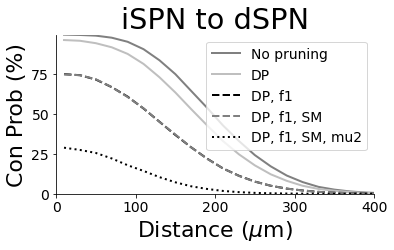

Wrote Fig2_network/figures/Summary-pruning-dist-dep-connection-probability-iSPN-to-dSPN-synapses.png
Centering in Striatum : Keeping 5000/5000
Calculating max synapses
Plotting 5025577 connections
Centering in Striatum : Keeping 5000/5000
Calculating max synapses
Plotting 4119460 connections
Centering in Striatum : Keeping 5000/5000
Calculating max synapses
Plotting 2318053 connections
Centering in Striatum : Keeping 5000/5000
Calculating max synapses
Plotting 2318047 connections
Centering in Striatum : Keeping 5000/5000
Calculating max synapses
Plotting 464171 connections


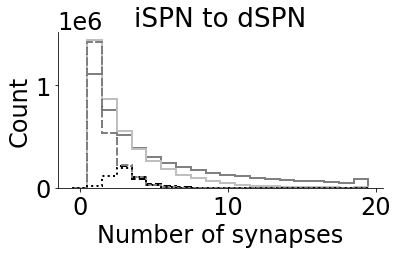

Wrote Fig2_network/figures/Summary-network-number-of-synapses-from-iSPN-to-dSPN-per-cell.png


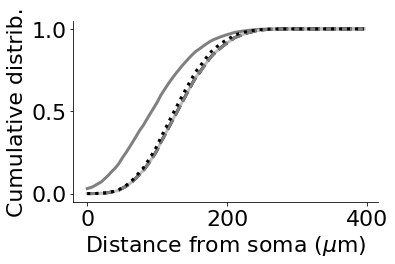

Wrote Fig2_network/figures/Summary-cumDist-of-synapses-from-iSPN-to-dSPN-per-cell.png


In [6]:
mpf = MethodsPaperFigure2(network_file_list=network_file_list)
mpf.make_connection_probability_summary('iSPN', 'dSPN')
mpf.make_num_synapses_summary_figure('iSPN', 'dSPN')
mpf.summary_plot_cum_dist('iSPN', 'dSPN')